Dataset do Kaggle:Top 10 Machine Learning datasets

# Importações

In [127]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics, cluster
import seaborn as sns
from scipy.cluster import hierarchy
from matplotlib import pyplot, pylab

In [128]:
data_raw = pd.read_csv('cars_clus.csv')
data_raw.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


# Verificando dados inconsistentes

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   117 non-null    object 
 1   model      117 non-null    object 
 2   sales      117 non-null    float64
 3   resale     117 non-null    float64
 4   type       117 non-null    int64  
 5   price      117 non-null    float64
 6   engine_s   117 non-null    float64
 7   horsepow   117 non-null    int64  
 8   wheelbas   117 non-null    float64
 9   width      117 non-null    float64
 10  length     117 non-null    float64
 11  curb_wgt   117 non-null    float64
 12  fuel_cap   117 non-null    float64
 13  mpg        117 non-null    float64
 14  lnsales    117 non-null    float64
 15  partition  117 non-null    int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 14.8+ KB


In [4]:
data_raw.dtypes

manufact      object
model         object
sales        float64
resale       float64
type           int64
price        float64
engine_s     float64
horsepow       int64
wheelbas     float64
width        float64
length       float64
curb_wgt     float64
fuel_cap     float64
mpg          float64
lnsales      float64
partition      int64
dtype: object

In [5]:
data_raw.isnull().sum()

manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [6]:
data_raw.isna().sum()

manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [7]:
data_raw.duplicated().sum()

0

In [8]:
data_raw.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [9]:
np.unique(data_raw['manufact'], return_counts=True)

(array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
        'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
        'Jeep', 'Lexus', 'Lincoln', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
        'Porsche', 'Saturn', 'Toyota', 'Volkswagen'], dtype=object),
 array([ 3,  3,  2,  4,  3,  8,  5,  9, 10,  5,  3,  1,  3,  3,  2,  4,  6,
         7,  5,  4,  3,  5,  3,  3,  8,  5]))

In [10]:
np.unique(data_raw['model'], return_counts=True)

(array(['3000GT', '328i', '4Runner', '528i', 'A4', 'A6', 'A8', 'Accent',
        'Accord', 'Altima', 'Aurora', 'Avalon', 'Avenger', 'Bonneville',
        'Boxter', 'Bravada', 'Breeze', 'C-Class', 'CR-V', 'Cabrio',
        'Camaro', 'Camry', 'Caravan', 'Carrera Cabriolet', 'Carrera Coupe',
        'Catera', 'Cavalier', 'Celica', 'Century', 'Cherokee', 'Cirrus',
        'Civic', 'Concorde', 'Continental', 'Contour', 'Corolla',
        'Corvette', 'Cougar', 'Crown Victoria', 'Cutlass', 'Dakota',
        'DeVille', 'Diamante', 'E-Class', 'ES300', 'Eclipse', 'Elantra',
        'Eldorado', 'Escort', 'Expedition', 'Explorer', 'F-Series',
        'Firebird', 'GS300', 'GTI', 'Galant', 'Golf', 'Grand Am',
        'Grand Cherokee', 'Grand Marquis', 'Grand Prix', 'I30', 'Integra',
        'Jetta', 'LHS', 'LS400', 'Land Cruiser', 'LeSabre', 'Lumina',
        'Malibu', 'Maxima', 'Metro', 'Mirage', 'Monte Carlo', 'Montero',
        'Montero Sport', 'Mountaineer', 'Mustang', 'Mystique', 'Neon',
      

Como podemos ver na contagem dos valores únicos acima, o que é estranho é que temos somente um item que é reproduzido 2 vezes, vamos verificar esta informação.

In [11]:
model_unique = np.unique(data_raw['model'], return_counts=True)
dict_unique = {c:v for c, v in zip(model_unique[0], model_unique[1])}
print(f'O valor duplo é : {[c  for c, v in dict_unique.items() if v > 1]}')

O valor duplo é : ['Neon']


In [12]:
data_raw.loc[data_raw['model'] == 'Neon']

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
28,Dodge,Neon,76.034,7.75,0,12.64,2.0,132,105.0,74.4,174.4,2.567,12.5,29.0,4.331,0
90,Plymouth,Neon,32.734,7.75,0,12.64,2.0,132,105.0,74.4,174.4,2.559,12.5,29.0,3.488,0


Como verificamos a opção de modelo a única que esta reproduzindo duas vezes é o 'Neon', então abrimos as linhas que contem este modelo e verificamos que apesar de muitos valores estarem duplicados, certas colunas como a manufatura (manufact), vendas (sales), peso mínimo (curb_wgt) e à venda (Insales) estão com valores diferentes. Sendo assim linhas não estão duplicadas.

Como não localizamos valores inconsistentes iremos atribuir ao Data Frame definitivo.

In [129]:
df = data_raw

# Exploração dos dados

In [14]:
df.describe()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,59.112316,18.031538,0.247863,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.117949,3.401179,0.0
std,75.058933,11.605632,0.433629,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404164,1.337862,0.0
min,0.110000,5.160000,0.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,-2.207000,0.0
25%,16.767000,11.240000,0.000000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,2.819000,0.0
50%,32.299000,14.010000,0.000000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,3.475000,0.0
75%,76.029000,19.875000,0.000000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,4.331000,0.0
max,540.561000,67.550000,1.000000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,6.293000,0.0


Teremos que efetuar uma padronização dos valores pois existe uma diferença muito grande de valores entre as colunas.

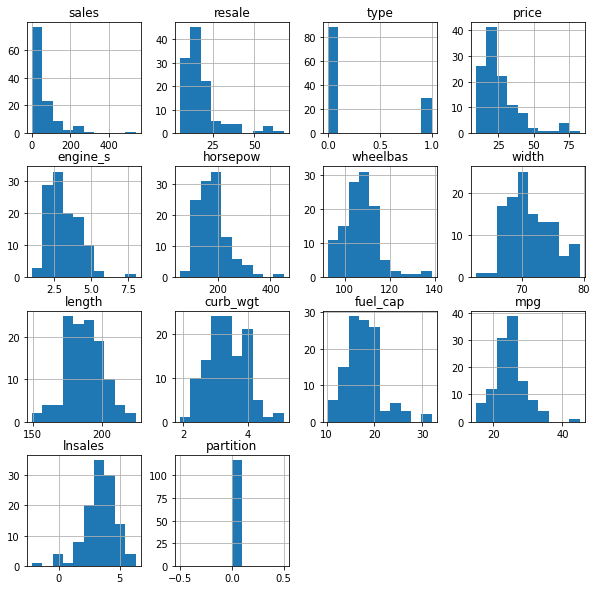

In [15]:
df.hist(figsize=(10,10));

Como podemos ver acima, temos uma distribuição ruim em algumas colunas

# Normalizando os dados

In [130]:
df_selecao = df[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
df_selecao.shape

(117, 8)

Acima selecionamos somente as características dos carros para o agrupamento.

In [131]:
s_df = df_selecao.values
norm = preprocessing.MinMaxScaler()
df_norm = norm.fit_transform(s_df)
df_norm[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Normalizamos os dados colocando os mesmos dentro de um intervalo de 0 e 1

# Distância euclidiana

In [132]:
dist_df_norm = metrics.pairwise.euclidean_distances(df_norm, df_norm)
dist_df_norm[0:1]

array([[0.        , 0.57777143, 0.75455727, 0.2128736 , 0.77290095,
        1.04388755, 0.36842756, 0.56119503, 0.60285234, 0.7247098 ,
        0.89001868, 0.75843206, 1.02153513, 0.96535724, 0.63567563,
        0.17071078, 0.40323491, 0.61853796, 0.63420586, 0.6754556 ,
        0.93915518, 0.21397175, 0.80969062, 0.37590216, 0.44135804,
        0.789647  , 0.360225  , 0.86544357, 0.43833127, 0.35062872,
        0.41233945, 1.39719208, 1.65751061, 1.36554648, 1.51566212,
        1.07292701, 0.79233821, 0.13903196, 0.54835405, 0.29241045,
        0.6088358 , 1.11985701, 0.7983668 , 1.0894434 , 1.40878766,
        0.66400653, 1.57974136, 0.20393746, 0.3770946 , 0.27656925,
        0.69702407, 1.00353778, 0.26967695, 0.08283378, 0.4222794 ,
        0.5740503 , 0.58142148, 0.57784373, 0.76458229, 0.54793816,
        0.65334392, 0.92651776, 0.98116752, 1.18919833, 0.17306181,
        0.24453155, 0.31160876, 0.62953169, 0.56068485, 0.93464515,
        0.53842915, 0.25073154, 0.29894151, 0.62

Aqui calculamos a distancia euclidiana para a formação dos clusters

# Agrupamento

In [133]:
df_matrix = hierarchy.linkage(dist_df_norm, 'complete')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Acima para calcularmos a distância entre os clusters utilizamos o completo, caso seja necessário posteriormente poderemos alterar para único (single), médio (average), ponderado (weighted) e centróide (centroid).

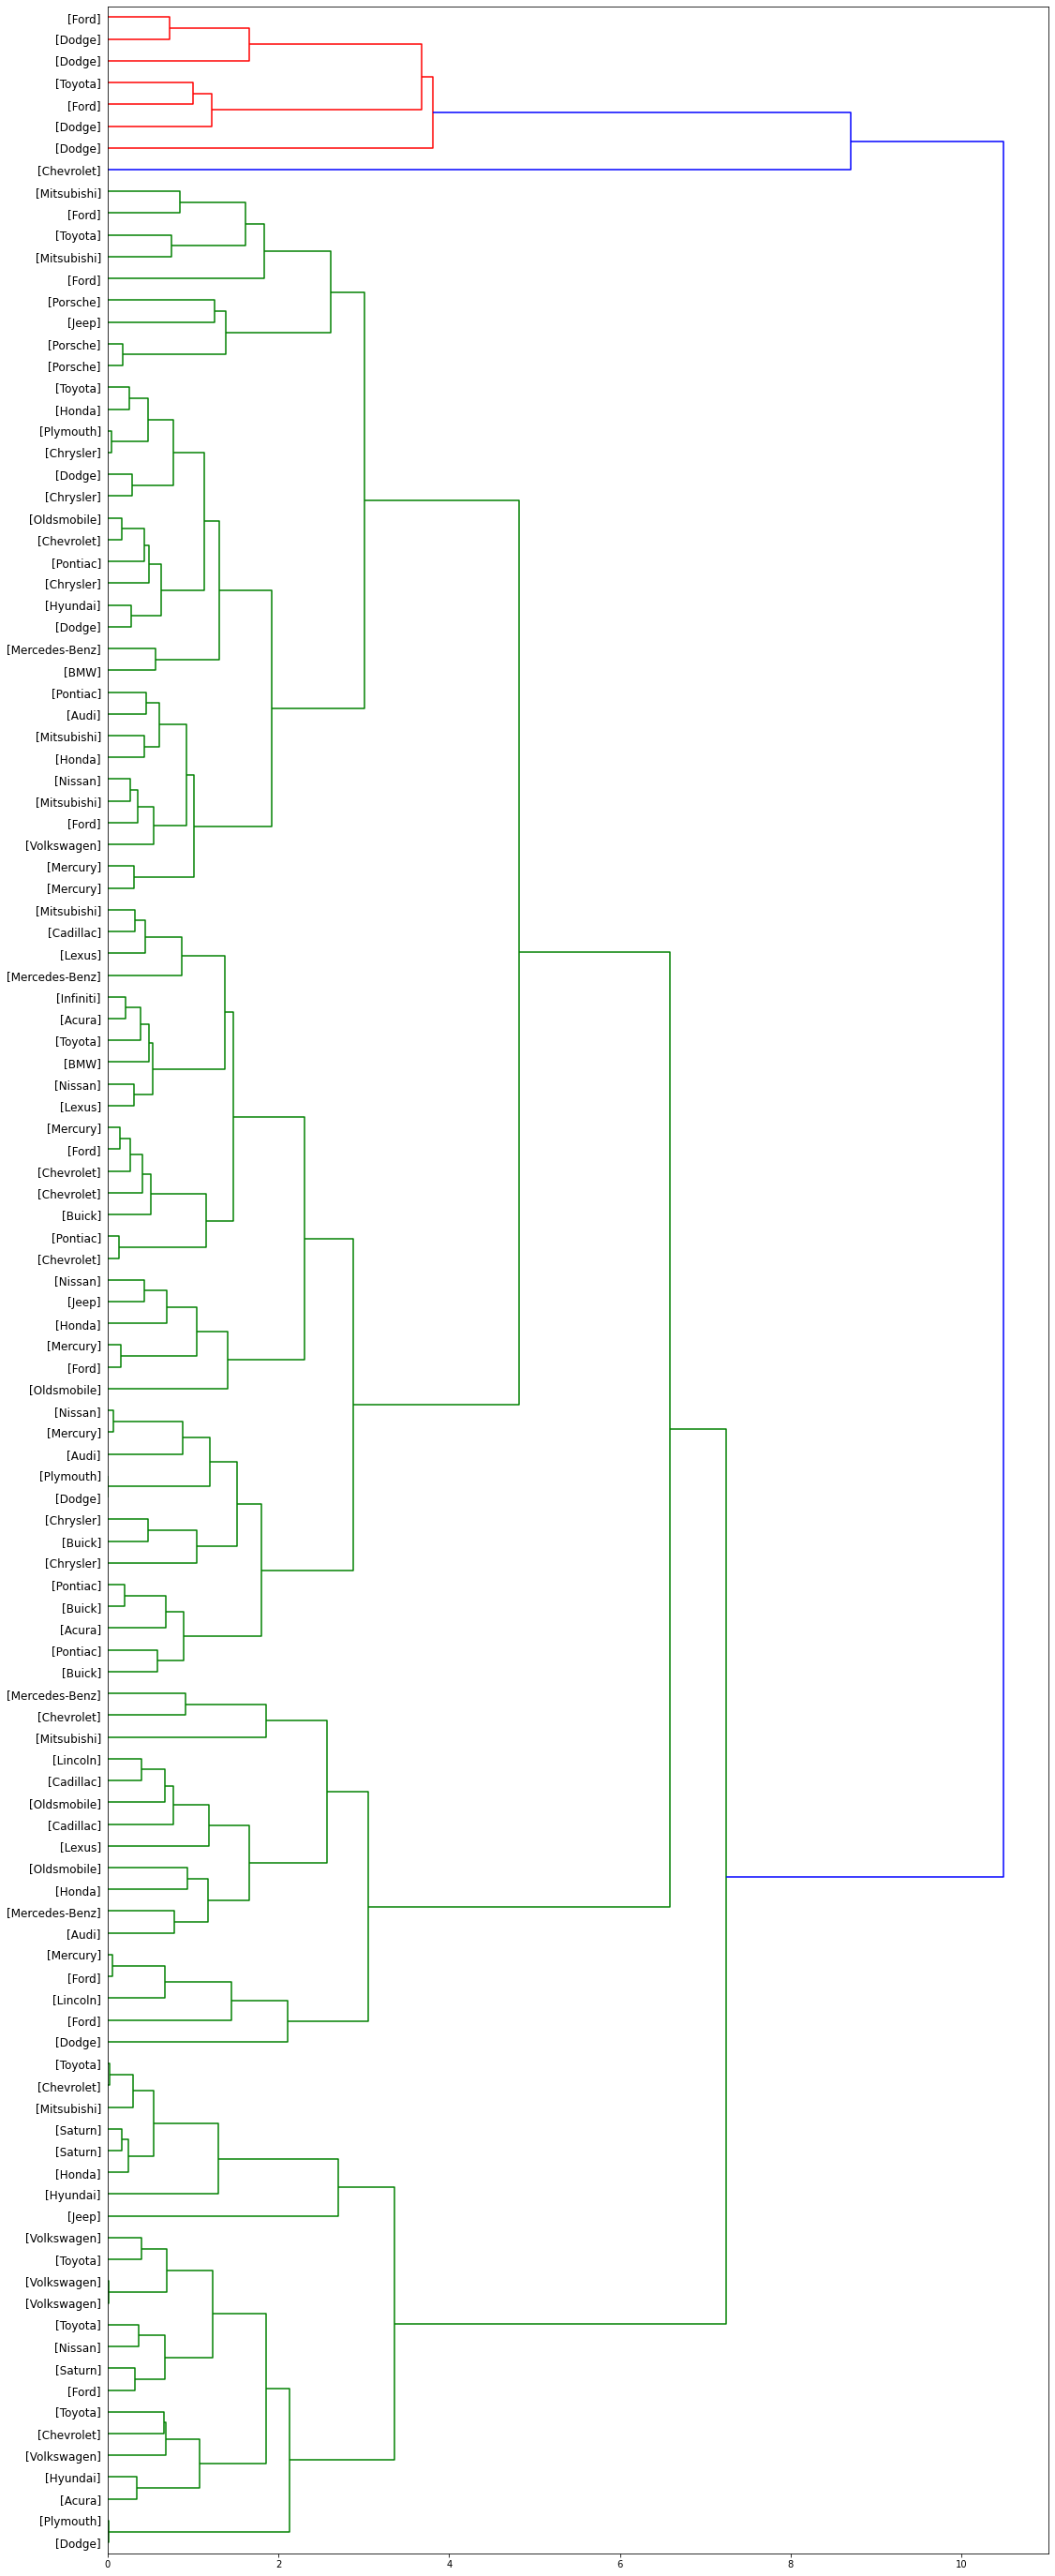

In [136]:
fig = pylab.figure(figsize=(18,50))
def coluna(id):
    return '[%s]' % (df['manufact'][id] )
hierarchy.dendrogram(df_matrix, leaf_label_func=coluna, leaf_rotation=0, leaf_font_size =12, orientation = 'right');

Acima criamos uma função para escolher uma coluna para descrever a formação da hierarquia.

In [137]:
clust = cluster.AgglomerativeClustering(n_clusters=6, linkage='complete')
clust.fit(df_matrix)
clust.labels_

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 4, 2, 0, 0, 0, 4,
       4, 4, 2, 2, 4, 4, 2, 1, 1, 4, 0, 4, 4, 0, 2, 1, 4, 0, 2, 2, 1, 0,
       4, 2, 4, 2, 2, 4, 4, 0, 4, 4, 4, 4, 1, 4, 0, 4, 2, 0, 4, 4, 4, 1,
       0, 5, 5, 4, 0, 5, 5, 0, 5, 1, 5, 0, 4, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       0, 3, 3, 3, 0, 3, 0])

Aqui são mostrados os clusters formados.

In [138]:
df['clusters'] = clust.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,clusters
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,2
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,2
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,1
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,2
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,2


Aqui integramos os clusters ao nosso Data Frame.

In [142]:
df.groupby(['clusters', 'type'])['engine_s', 'horsepow', 'wheelbas', 'width', 
                                 'length', 'curb_wgt', 'fuel_cap', 'mpg'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


engine_s    horsepow    wheelbas  ...  curb_wgt   fuel_cap        mpg
clusters type                                    ...                                
0        0     3.081250  191.062500  105.118750  ...  3.267187  17.031250  24.625000
         1     3.571429  181.428571  112.942857  ...  3.729857  20.428571  20.857143
1        0     2.923077  181.846154  107.153846  ...  3.197231  16.330769  25.692308
         1     3.700000  192.500000  122.650000  ...  4.293000  26.000000  19.500000
2        0     3.217241  200.172414  106.365517  ...  3.263138  16.889655  24.958621
         1     3.528571  184.000000  115.142857  ...  3.972857  23.500000  18.285714
3        0     2.000000  115.000000   98.400000  ...  2.899667  14.233333  26.000000
         1     4.700000  230.000000  112.200000  ...  5.115000  25.400000  15.000000
4        0     2.812500  177.562500  105.650000  ...  3.158188  17.043750  25.187500
         1     3.166667  166.111111  110.677778  ...  3.741889  20.922222  20.000000
5        0     2.454545  152.363636  103.972727  ...  2.792818  15.045455  28.090909
         1     2.600000  151.333333  106.066667  ...  3.065333  18.466667  24.000000

[12 rows x 8 columns]

# Visualização

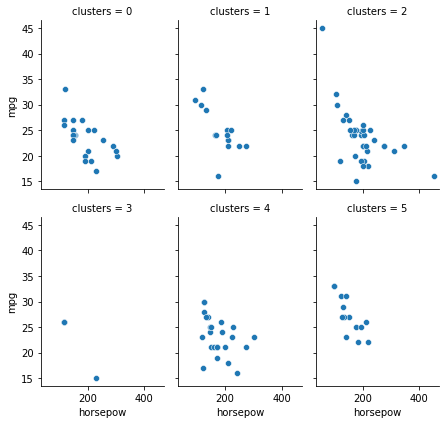

In [169]:
g = sns.FacetGrid(df, col='clusters', height=3, aspect=.70, col_wrap=3)
g.map(sns.scatterplot, 'horsepow', 'mpg');

Aqui podemos visualizar como os clusters se encontram em relação aos indicadores cavalo de potência (horsepow) e eficiência de combustível (mpg).